In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as st
from scipy.stats import linregress

In [10]:
# File to Load (Remember to Change These)
file_to_load = "Data/owid-covid-data.csv"

# Read covid-data File and store into Pandas data frame
covid_data = pd.read_csv(file_to_load)

In [11]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121449 entries, 0 to 121448
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 121449 non-null  object 
 1   continent                                115916 non-null  object 
 2   location                                 121449 non-null  object 
 3   date                                     121449 non-null  object 
 4   total_cases                              115316 non-null  float64
 5   new_cases                                115313 non-null  float64
 6   new_cases_smoothed                       114298 non-null  float64
 7   total_deaths                             104513 non-null  float64
 8   new_deaths                               104668 non-null  float64
 9   new_deaths_smoothed                      114298 non-null  float64
 10  total_cases_per_million         

In [41]:
aggregation = {'total_cases':'max','total_deaths':'max','people_vaccinated':'max','population':'max','human_development_index':'max'}
location_df = covid_data.groupby(['location','continent']).agg(aggregation).reset_index()
##location_df = location_df.set_index('location')
location_df['Total_cases_percent'] = location_df['total_cases']/location_df['population']
location_df = location_df[location_df.Total_cases_percent.notnull()]
location_df = location_df[location_df.human_development_index.notnull()]
location_df['Total_deaths_percent'] = location_df['total_deaths']/location_df['population']
location_df = location_df[location_df.Total_deaths_percent.notnull()]
location_df['people_vaccinated_percent'] = location_df['people_vaccinated']/location_df['population']
location_df = location_df[location_df.people_vaccinated_percent.notnull()]

In [42]:
location_df.head()

,location,continent,total_cases,total_deaths,people_vaccinated,population,human_development_index,Total_cases_percent,Total_deaths_percent,people_vaccinated_percent
0,Afghanistan,Asia,155309.0,7214.0,773002.0,39835428.0,0.511,0.003899,0.000181,0.019405
1,Albania,Europe,172618.0,2725.0,950620.0,2872934.0,0.795,0.060084,0.000949,0.330888
2,Algeria,Africa,204046.0,5831.0,6017036.0,44616626.0,0.748,0.004573,0.000131,0.134861
3,Andorra,Europe,15271.0,130.0,54312.0,77354.0,0.868,0.197417,0.001681,0.702123
4,Angola,Africa,59895.0,1587.0,2127405.0,33933611.0,0.581,0.001765,0.000047,0.062693


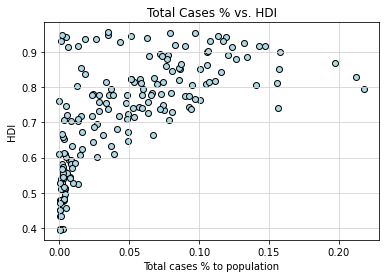

In [50]:
# Define x, y values and lables
title = "Total Cases % vs. HDI"
x_values = location_df['Total_cases_percent'].astype('float')
y_values = location_df['human_development_index'].astype('float')
x_label = "Total cases % to population"
y_label = "HDI"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig(f"images/{title}.png")
plt.show()

the correlation between Total cases % to population and HDI is 0.64
The R Squared: 0.4079940869522567


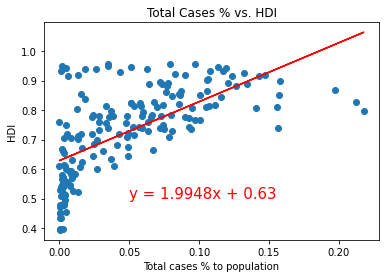

In [51]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,0.5),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"images/{title}_LR.png")
# Show plot
plt.show()

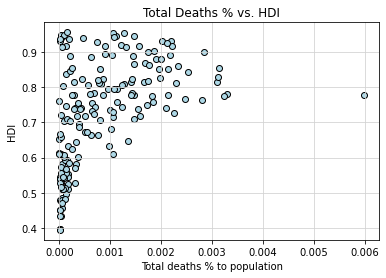

In [52]:
# Define x, y values and lables
title = "Total Deaths % vs. HDI"
x_values = location_df['Total_deaths_percent'].astype('float')
y_values = location_df['human_development_index'].astype('float')
x_label = "Total deaths % to population"
y_label = "HDI"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig(f"images/{title}.png")
plt.show()

the correlation between Total deaths % to population and HDI is 0.49
The R Squared: 0.2405580547689258


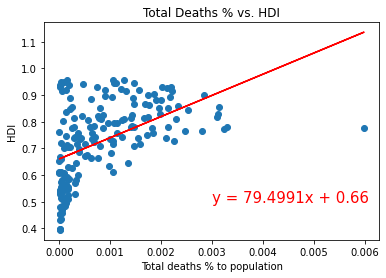

In [53]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.003,0.5),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"images/{title}_LR.png")
# Show plot
plt.show()

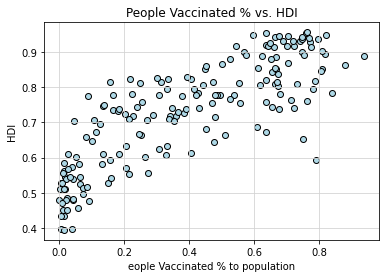

In [54]:
# Define x, y values and lables
title = "People Vaccinated % vs. HDI"
x_values = location_df['people_vaccinated_percent'].astype('float')
y_values = location_df['human_development_index'].astype('float')
x_label = "eople Vaccinated % to population"
y_label = "HDI"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig(f"images/{title}.png")
plt.show()

the correlation between eople Vaccinated % to population and HDI is 0.82
The R Squared: 0.6700316668927263


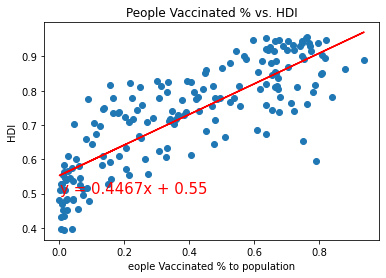

In [55]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.003,0.5),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"images/{title}_LR.png")
# Show plot
plt.show()